In [193]:
# Import Dependencies
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "CountyPovertyRate.csv"
county_pov_df = pd.read_csv(csv_path)

county_pov_df.head()

,Rank,County,Poverty Rate,Urban/Rural/Sub
0,1st,Carver County,4.00%,Suburban
1,2nd,Washington County,5.00%,Suburban
2,3rd,Wright County,5.00%,Suburban
3,4th,Chisago County,5.40%,Rural
4,5th,Scott County,5.60%,Suburban


In [195]:
county_pov_df["Poverty Rate"]

0      4.00%
1      5.00%
2      5.00%
3      5.40%
4      5.60%
       ...  
82    17.10%
83    17.90%
84    18.10%
85    19.00%
86    22.70%
Name: Poverty Rate, Length: 87, dtype: object

In [196]:
pov_rate = []
county = []
for i in range(len(county_pov_df)):
    county_pov_int = county_pov_df["Poverty Rate"][i]
    county_str = county_pov_df["County"][i]
    county_pov_int = county_pov_int.split("%")[0]
    county_str = county_str.split(" County")[0]
    pov_rate.append(county_pov_int)
    county.append(county_str)

In [197]:
county_pov_df = county_pov_df.drop(columns=["Poverty Rate"],axis=1)

In [198]:
county_pov_df = county_pov_df.drop(columns=["County"],axis=1)

In [199]:
county_pov_df["Poverty Rate (%)"] = pov_rate
county_pov_df["County"] = county
county_pov_df.head(12)

,Rank,Urban/Rural/Sub,Poverty Rate (%),County
0,1st,Suburban,4.00,Carver
1,2nd,Suburban,5.00,Washington
2,3rd,Suburban,5.00,Wright
3,4th,Rural,5.40,Chisago
4,5th,Suburban,5.60,Scott
5,6th,Rural,5.70,Dodge
6,7th,Rural,6.10,Wabasha
7,8th,Rural,6.40,Sherburne
8,9th,Suburban,6.60,Anoka
9,10th,Suburban,6.90,Dakota


In [200]:
#re-order columns
county_pov_df = county_pov_df[['Rank','County','Poverty Rate (%)','Urban/Rural/Sub']]
county_pov_df.head()

,Rank,County,Poverty Rate (%),Urban/Rural/Sub
0,1st,Carver,4.00,Suburban
1,2nd,Washington,5.00,Suburban
2,3rd,Wright,5.00,Suburban
3,4th,Chisago,5.40,Rural
4,5th,Scott,5.60,Suburban


In [201]:
county_pov_df.dtypes 

Rank                object
County              object
Poverty Rate (%)    object
Urban/Rural/Sub     object
dtype: object

In [202]:
county_pov_df["Poverty Rate (%)"] = pd.to_numeric(county_pov_df["Poverty Rate (%)"])
county_pov_df.dtypes 

Rank                 object
County               object
Poverty Rate (%)    float64
Urban/Rural/Sub      object
dtype: object

In [203]:
type(county_pov_df["County"][0])

str

In [204]:
#arsenic 
csv_path1 = "arsenic_2017.csv"
arsenic_df = pd.read_csv(csv_path1)

arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips,Unnamed: 11
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0,NaN
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0,NaN
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0,NaN
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0,NaN
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0,NaN


In [205]:
arsenic_df = arsenic_df.drop(columns=["Unnamed: 11"],axis=1)

In [206]:
arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0


In [207]:
#check for missing info
arsenic_df.count()

pwsId               972
year                962
analyteCode         962
pwsName             962
countyServed        962
cityServed          962
waterSource         962
mean                962
max                 962
populationServed    962
fips                962
dtype: int64

In [208]:
#checks for null/missing data
null_data = arsenic_df[arsenic_df.isnull().any(axis=1)]
null_data

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
962,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,Minnesota Public Health Data Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,Minnesota Environmental Public Health Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,Minnesota Department of Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,P.O. Box 64882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,"St. Paul, MN 55164-0882",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,Phone: (651) 201-5900 or toll free: 1-800-205-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,Fax: (651) 201-5926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970,E-mail: tracking.health@state.mn.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971,Web: http://health.mn.gov/mndata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
# #drop missing data
arsenic_df = arsenic_df.dropna(how='any')
arsenic_df.count()

pwsId               962
year                962
analyteCode         962
pwsName             962
countyServed        962
cityServed          962
waterSource         962
mean                962
max                 962
populationServed    962
fips                962
dtype: int64

In [210]:
arsenic_df.dtypes 

pwsId                object
year                float64
analyteCode          object
pwsName              object
countyServed         object
cityServed           object
waterSource          object
mean                 object
max                  object
populationServed    float64
fips                float64
dtype: object

In [211]:
arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0


In [212]:
mean_col = []
max_col = []

for i in range(len(arsenic_df)):
    mean_int = arsenic_df["mean"][i]
    max_int = arsenic_df["max"][i]
    
    mean_int = mean_int.split(" ")[0]
    max_int = max_int.split(" ")[0]
    
    mean_col.append(mean_int)
    max_col.append(max_int)

In [213]:
arsenic_df["Mean (ug/L)"] = mean_col
arsenic_df["Max (ug/L)"] = max_col

arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips,Mean (ug/L),Max (ug/L)
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0,3.09,3.22
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0,0.5,0.5
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0,5.29,6.02
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0,4.77,4.77
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0,4.83,4.83


In [214]:
arsenic_df = arsenic_df.drop(columns=["mean"],axis=1)

In [215]:
arsenic_df = arsenic_df.drop(columns=["max"],axis=1)

In [216]:
arsenic_df["populationServed"] = arsenic_df["populationServed"].astype(int)

In [217]:
arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,populationServed,fips,Mean (ug/L),Max (ug/L)
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,2165,27001.0,3.09,3.22
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,45,27001.0,0.5,0.5
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,25,27001.0,5.29,6.02
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,633,27001.0,4.77,4.77
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,394,27001.0,4.83,4.83


In [218]:
#rename columns:
arsenic_df = arsenic_df.rename(columns = {"pwsId":"ID", "pwsName":"Power System", "year":"Year",
                                "analyteCode":"Analyte","countyServed": "County",
                                "cityServed": "City Served","waterSource": "Water Source",
                                "populationServed": "Population Served","fips": "FIPS"})
arsenic_df.head()

,ID,Year,Analyte,Power System,County,City Served,Water Source,Population Served,FIPS,Mean (ug/L),Max (ug/L)
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,2165,27001.0,3.09,3.22
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,45,27001.0,0.5,0.5
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,25,27001.0,5.29,6.02
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,633,27001.0,4.77,4.77
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,394,27001.0,4.83,4.83


In [219]:
arsenic_df["Year"].unique()

array([2017.])

In [220]:
#converts to int
arsenic_df["Year"] = arsenic_df["Year"].astype(int)
#converts to str
arsenic_df["Year"] = arsenic_df["Year"].astype(str)
arsenic_df.dtypes

ID                    object
Year                  object
Analyte               object
Power System          object
County                object
City Served           object
Water Source          object
Population Served      int64
FIPS                 float64
Mean (ug/L)           object
Max (ug/L)            object
dtype: object

In [221]:
arsenic_df.head()

,ID,Year,Analyte,Power System,County,City Served,Water Source,Population Served,FIPS,Mean (ug/L),Max (ug/L)
0,1010001,2017,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,2165,27001.0,3.09,3.22
1,1010002,2017,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,45,27001.0,0.5,0.5
2,1010019,2017,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,25,27001.0,5.29,6.02
3,1010011,2017,Arsenic,Hill City,Aitkin,Hill City,Groundwater,633,27001.0,4.77,4.77
4,1010016,2017,Arsenic,McGregor,Aitkin,McGregor,Groundwater,394,27001.0,4.83,4.83


In [222]:
arsenic_df["Mean (ug/L)"] = pd.to_numeric(arsenic_df["Mean (ug/L)"])
arsenic_df["Max (ug/L)"] = pd.to_numeric(arsenic_df["Max (ug/L)"])
arsenic_df.dtypes

ID                    object
Year                  object
Analyte               object
Power System          object
County                object
City Served           object
Water Source          object
Population Served      int64
FIPS                 float64
Mean (ug/L)          float64
Max (ug/L)           float64
dtype: object

In [223]:
arsenic_df = arsenic_df[['Year','ID','Power System','Water Source','County',
                         'City Served','Population Served','Analyte','Mean (ug/L)','Max (ug/L)','FIPS']]
arsenic_df.head()

,Year,ID,Power System,Water Source,County,City Served,Population Served,Analyte,Mean (ug/L),Max (ug/L),FIPS
0,2017,1010001,Aitkin,Groundwater,Aitkin,Aitkin,2165,Arsenic,3.09,3.22,27001.0
1,2017,1010002,Thompson Mobile Home Park,Groundwater,Aitkin,Aitkin,45,Arsenic,0.50,0.50,27001.0
2,2017,1010019,Why-Not Park,Groundwater,Aitkin,Aitkin,25,Arsenic,5.29,6.02,27001.0
3,2017,1010011,Hill City,Groundwater,Aitkin,Hill City,633,Arsenic,4.77,4.77,27001.0
4,2017,1010016,McGregor,Groundwater,Aitkin,McGregor,394,Arsenic,4.83,4.83,27001.0


In [224]:
county_grouped = arsenic_df.groupby(["County"]) 
mean_concentration = county_grouped.mean()["Mean (ug/L)"]
#average_max_concentration = county_grouped.mean()["Max (ug/L)"]

In [225]:
ByCounty_df = pd.DataFrame(mean_concentration)
ByCounty_df = ByCounty_df.reset_index()
ByCounty_df.head()

,County,Mean (ug/L)
0,Aitkin,3.373333
1,Anoka,1.707419
2,Becker,3.302222
3,Beltrami,1.753750
4,Benton,1.104286


In [226]:
county_pov_df.head()

,Rank,County,Poverty Rate (%),Urban/Rural/Sub
0,1st,Carver,4.0,Suburban
1,2nd,Washington,5.0,Suburban
2,3rd,Wright,5.0,Suburban
3,4th,Chisago,5.4,Rural
4,5th,Scott,5.6,Suburban


In [227]:
county_combined = pd.merge(ByCounty_df,county_pov_df, on = "County", how = "outer")
county_combined.head()

,County,Mean (ug/L),Rank,Poverty Rate (%),Urban/Rural/Sub
0,Aitkin,3.373333,60th,12.1,Rural
1,Anoka,1.707419,9th,6.6,Suburban
2,Becker,3.302222,67th,12.7,Rural
3,Beltrami,1.753750,86th,19.0,Rural
4,Benton,1.104286,74th,14.1,Rural


In [228]:
county_grouped = arsenic_df.groupby(["County"]) 
sd_concentration = county_grouped.std()["Mean (ug/L)"]

ByCounty1_df = pd.DataFrame(sd_concentration)
ByCounty1_df = ByCounty1_df.reset_index()
ByCounty1_df.head()


,County,Mean (ug/L)
0,Aitkin,1.933149
1,Anoka,1.492090
2,Becker,3.619809
3,Beltrami,1.374248
4,Benton,0.777386


In [229]:
ByCounty1_df = ByCounty1_df.rename(columns = {"Mean (ug/L)":"Standard Deviation (ug/L)"})

county_combined = pd.merge(ByCounty1_df,county_combined, on = "County", how = "outer")
county_combined.head()



,County,Standard Deviation (ug/L),Mean (ug/L),Rank,Poverty Rate (%),Urban/Rural/Sub
0,Aitkin,1.933149,3.373333,60th,12.1,Rural
1,Anoka,1.492090,1.707419,9th,6.6,Suburban
2,Becker,3.619809,3.302222,67th,12.7,Rural
3,Beltrami,1.374248,1.753750,86th,19.0,Rural
4,Benton,0.777386,1.104286,74th,14.1,Rural


In [230]:
bins = [0,8,10,11.55,13.4,24]
#will come back later for naming 
bin_names = ["1","2","3","4","5"]

county_combined["Bin Poverty Rate"] = pd.cut(county_combined["Poverty Rate (%)"],bins, labels = bin_names)
county_combined.head()

,County,Standard Deviation (ug/L),Mean (ug/L),Rank,Poverty Rate (%),Urban/Rural/Sub,Bin Poverty Rate
0,Aitkin,1.933149,3.373333,60th,12.1,Rural,4
1,Anoka,1.492090,1.707419,9th,6.6,Suburban,1
2,Becker,3.619809,3.302222,67th,12.7,Rural,4
3,Beltrami,1.374248,1.753750,86th,19.0,Rural,5
4,Benton,0.777386,1.104286,74th,14.1,Rural,5


Text(0.5, 1.0, 'Bin Poverty Rate vs.  County Arsenic Concentration')

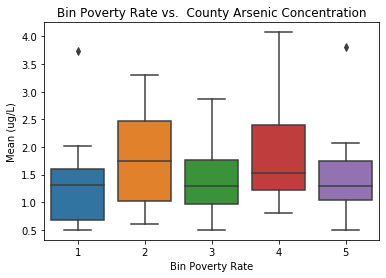

In [236]:
ax=sns.boxplot(x=county_combined["Bin Poverty Rate"], y=county_combined["Mean (ug/L)"])
ax.axes.set_title("Bin Poverty Rate vs.  County Arsenic Concentration")